## Script to read and plot PSSS scan
### Purpose: To plot and fit data from scanning the PSSS over a large energy range

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.optimize import curve_fit

In [23]:
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def bimodal(x, H_1, A_1, x0_1, sigma_1,H_2, A_2, x0_2, sigma_2):
    return gauss(x, H_1, A_1, x0_1, sigma_1)+gauss(x, H_2, A_2, x0_2, sigma_2)

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

def bimodal_fit(x, y, p0):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
#     popt, pcov = curve_fit(bimodal, x, y, p0=[min(y), max(y), mean-20, sigma,min(y), max(y), mean+20, sigma])
    popt, pcov = curve_fit(bimodal, x, y, p0)
    return popt

In [110]:
fn = "/sf/alvra/data/p19203/res/PhotoDiag/two_colour/energy_sep_003.h5"

In [111]:
with h5.File(fn, 'r') as fh:
    Scan_e_axis = fh['Scan_e_axis'][:]
    Scan_spec = fh['Scan_spec'][:]
    Energy_range = fh['Energy_range'][:]
    e_axis_full = fh['e_axis_full'][:]
    Bin_spec = fh['Bin_spec'][:]
    Spec_range = fh['Spec_range'][:]
Spec_range_norm = Spec_range/np.max(Spec_range)

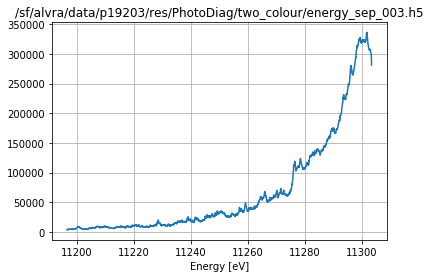

In [112]:
plt.figure()
plt.title(fn)
plt.plot(Scan_e_axis[0],Scan_spec[0].mean(axis=0))
plt.xlabel('Energy [eV]')
plt.grid(True)

In [113]:
p0=[min(Spec_range_norm), max(Spec_range_norm), 11320, 10,min(Spec_range_norm), max(Spec_range_norm), 11370, 10]
bpopt = bimodal_fit(e_axis_full, Spec_range_norm, p0)
deltaE = np.abs(bpopt[6]-bpopt[2])
if bpopt[5] > bpopt[1]:
    ratio = bpopt[5]/bpopt[1]
else:
    ratio = bpopt[1]/bpopt[5]

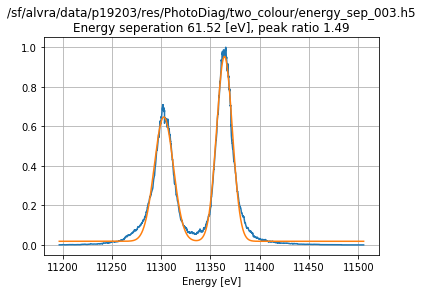

In [116]:
plt.figure()
plt.title(fn+ '\nEnergy seperation %.2f [eV], peak ratio %.2f'%(deltaE, ratio))
plt.plot(e_axis_full,Spec_range_norm)
plt.plot(e_axis_full, bimodal(e_axis_full, *bpopt))
plt.xlabel('Energy [eV]')
plt.grid(True)